# Reading and Understanding the data

In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# read the data
BoomBikes = pd.read_csv(r"C:\Users\Arpita.Datta\Downloads\day.csv")

# Checking the dataframe
BoomBikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
BoomBikes.shape

(730, 16)

In [4]:
BoomBikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
column_to_drop = 'instant'
BoomBikes = BoomBikes.drop(column_to_drop, axis=1)

In [6]:
column_to_drop = 'dteday'
BoomBikes = BoomBikes.drop(column_to_drop, axis=1)

In [7]:
BoomBikes = BoomBikes[['cnt', 'season', 'yr','mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']]

In [8]:
BoomBikes.describe()

,cnt,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,4508.006849,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534
std,1936.011647,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728
min,22.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000
25%,3169.750000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000
50%,4548.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000
75%,5966.000000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000
max,8714.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000


# Visualizing the data

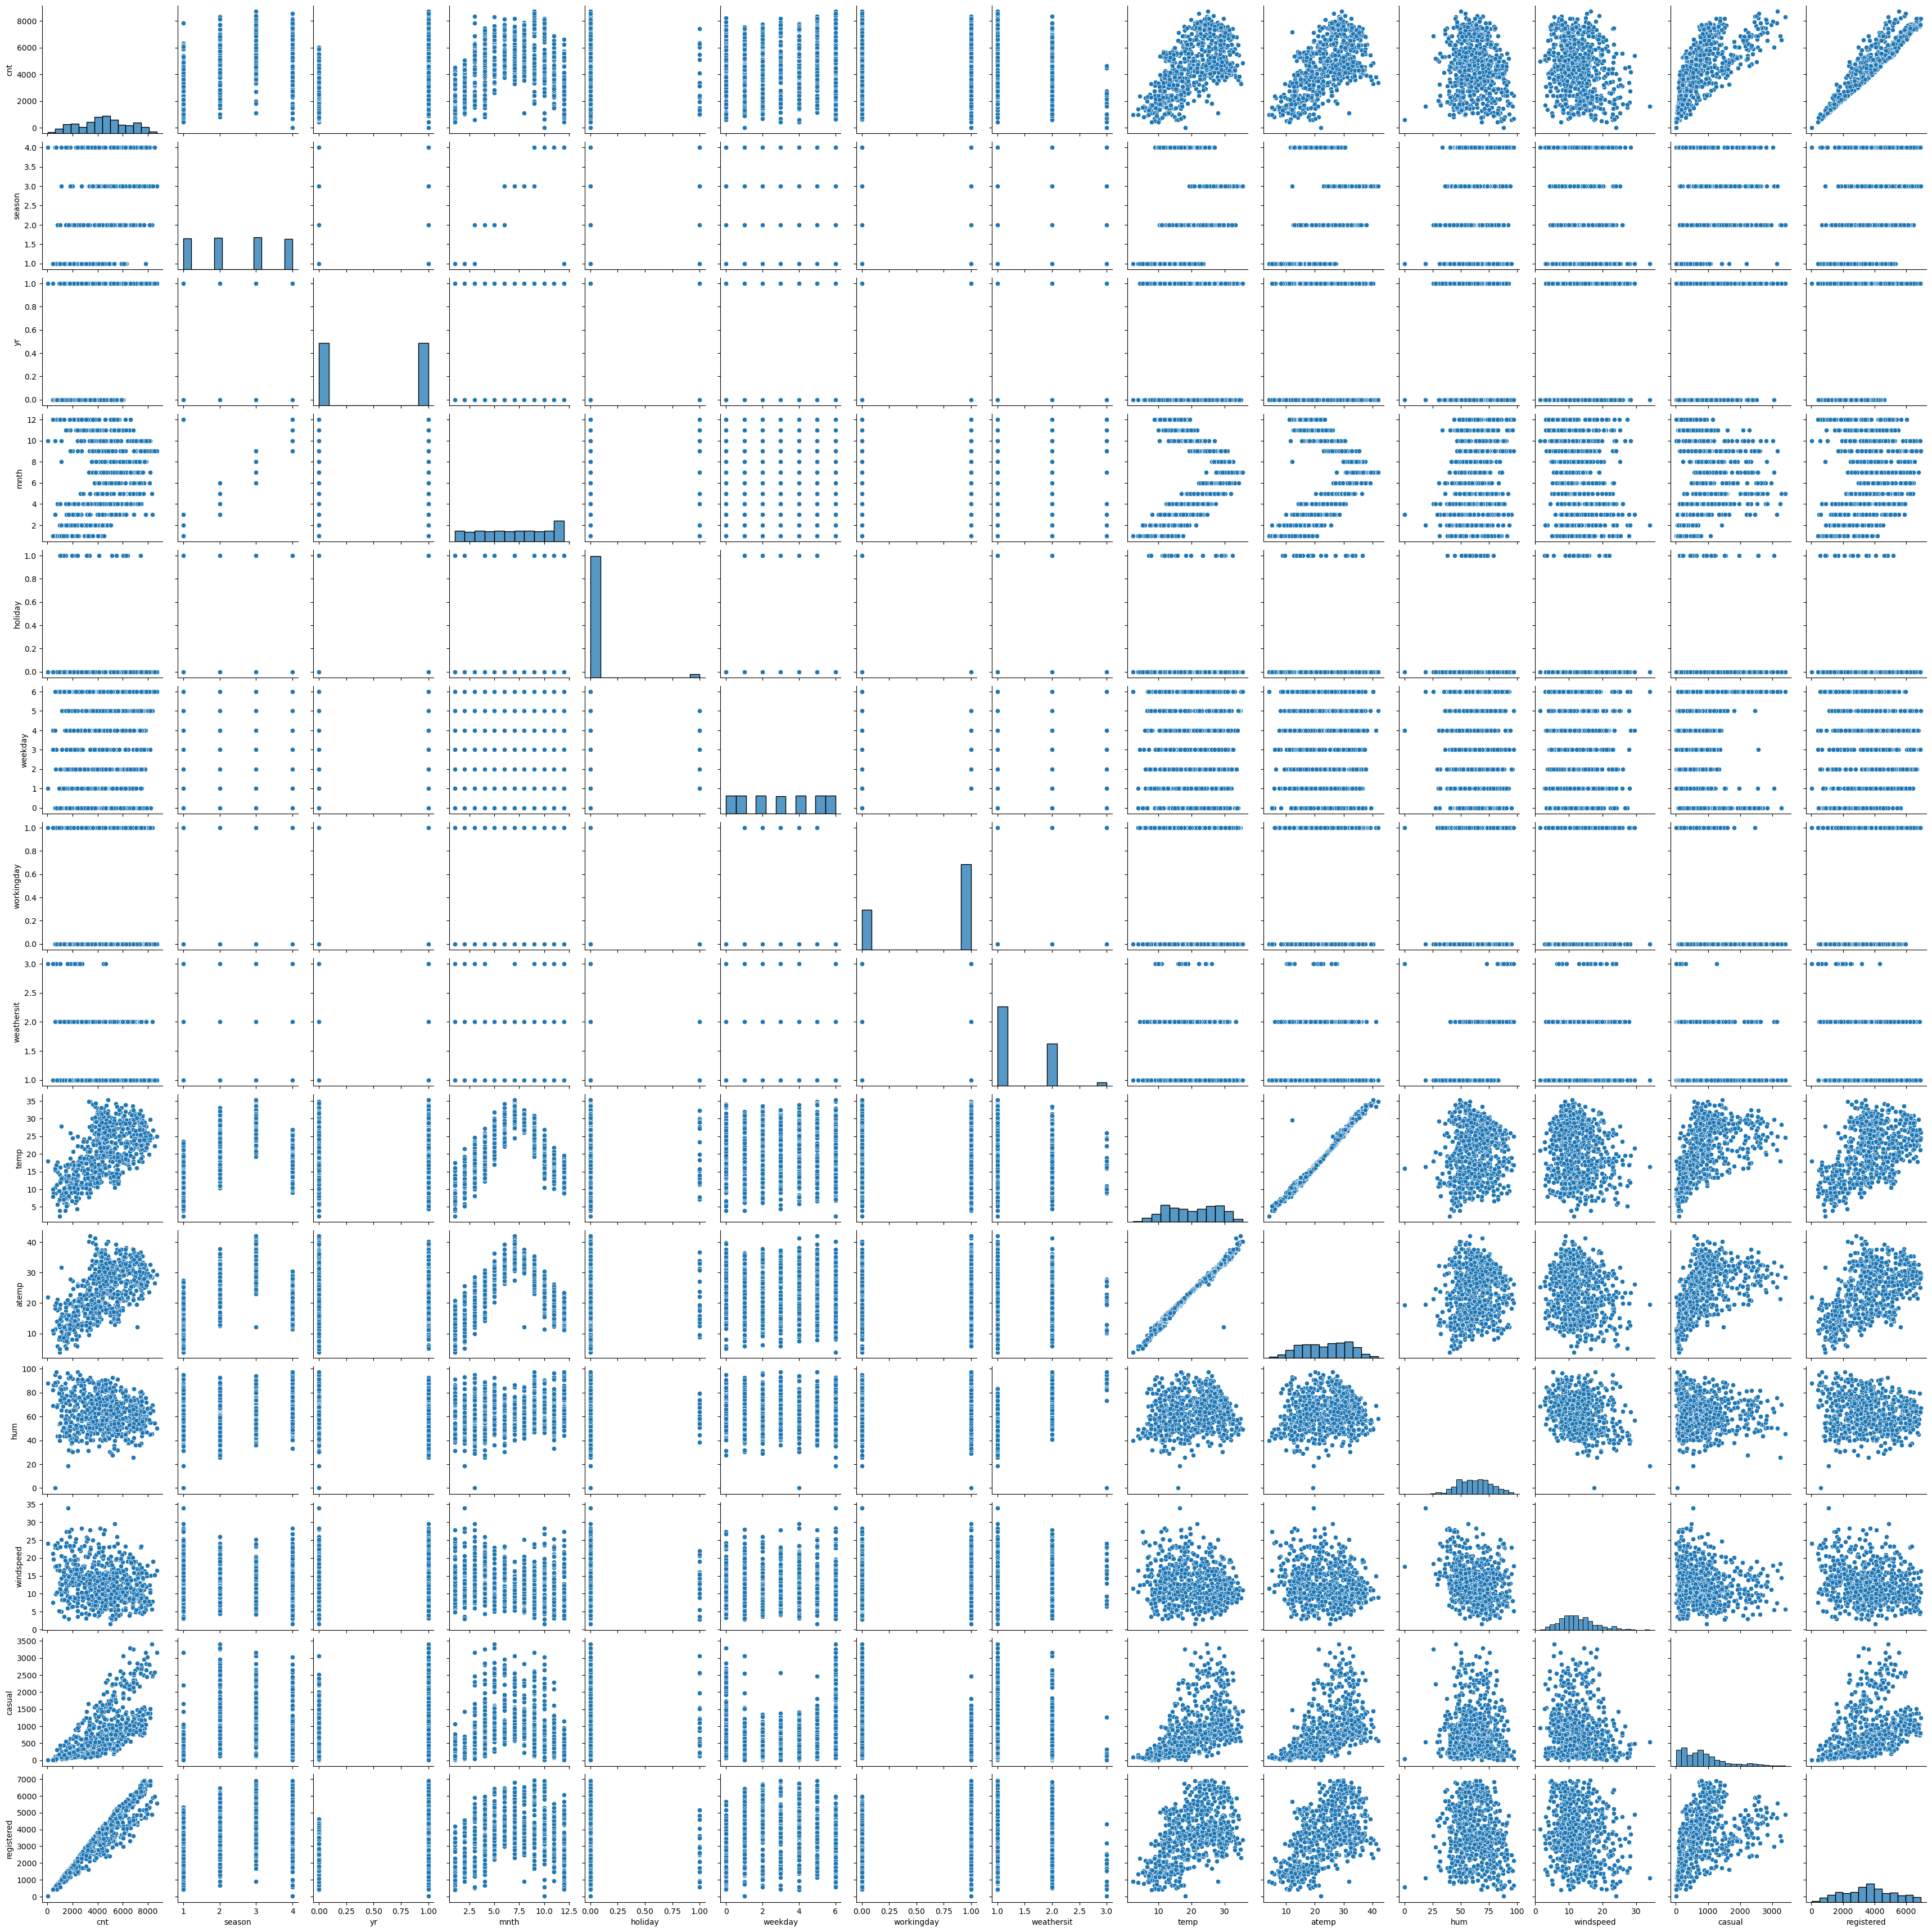

In [9]:
#visualization
sns.pairplot(BoomBikes)
plt.show()

<Axes: xlabel='workingday', ylabel='cnt'>

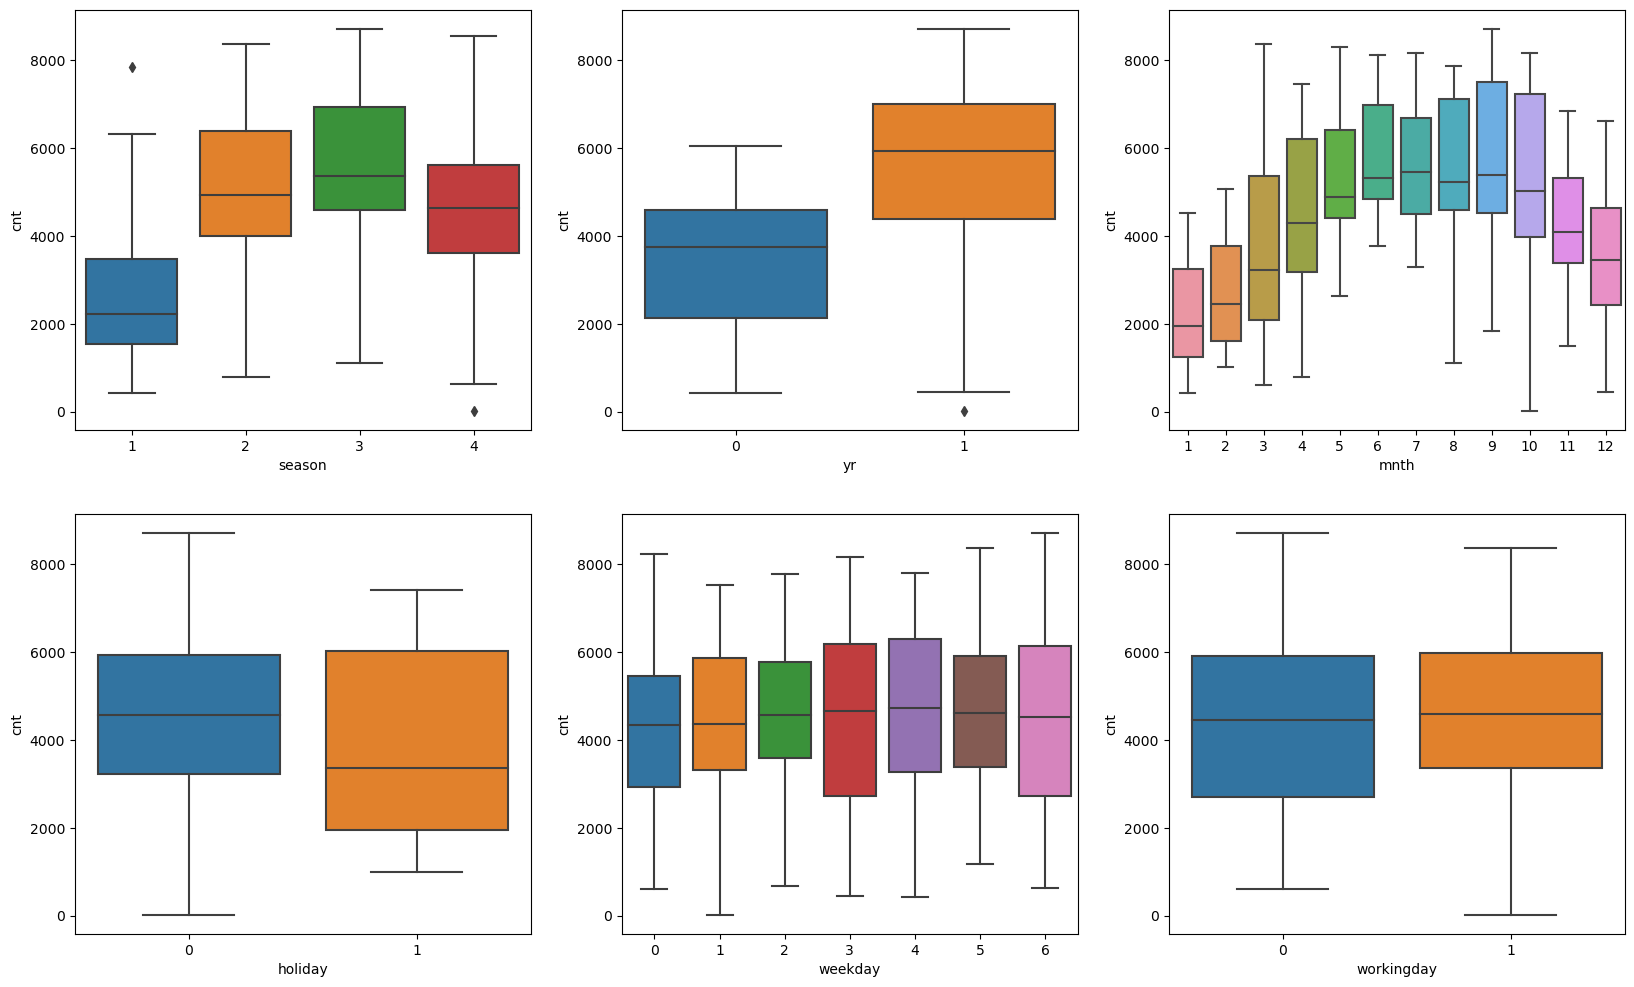

In [10]:
#visualizing the categorical variable
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=BoomBikes)
plt.subplot(2,3,2)
sns.boxplot(x='yr', y='cnt', data=BoomBikes)
plt.subplot(2,3,3)
sns.boxplot(x='mnth', y='cnt', data=BoomBikes)
plt.subplot(2,3,4)
sns.boxplot(x='holiday', y='cnt', data=BoomBikes)
plt.subplot(2,3,5)
sns.boxplot(x='weekday', y='cnt', data=BoomBikes)
plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='cnt', data=BoomBikes)

<Axes: xlabel='weathersit', ylabel='cnt'>

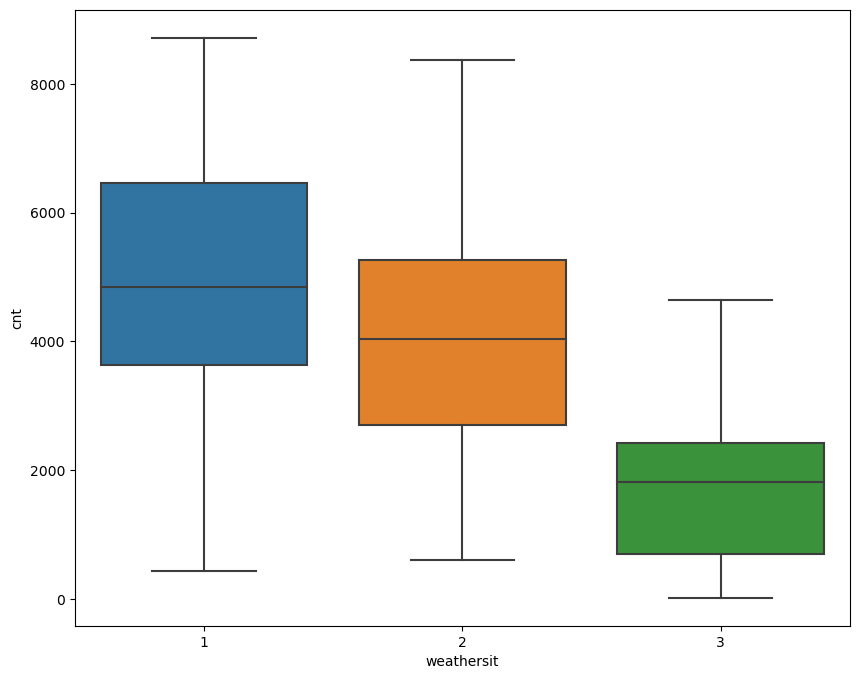

In [11]:
plt.figure(figsize=(10,8))
sns.boxplot(x='weathersit', y='cnt', data=BoomBikes)

# Preparing the data for modelling

### Splitting into Train and Test

In [12]:
df_train, df_test = train_test_split(BoomBikes, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 14)
(220, 14)


#### Rescaling the Features
1. Min Max Scaling (Normalisation): Between 0 and 1
2. Standardisation (mean-0, sigma-1)

In [13]:
# 1. Instantiate an object
scaler = MinMaxScaler()

#create a list of numeric vars
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

#fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,cnt,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
576,7216,3,1,7,0,2,1,1,0.815169,0.766351,0.725633,0.264686,968,6248
426,4066,1,1,3,0,6,0,2,0.442393,0.438975,0.640189,0.255342,956,3110
728,1796,1,1,12,0,0,0,1,0.245101,0.200348,0.498067,0.663106,364,1432
482,4220,2,1,4,0,6,0,2,0.395666,0.391735,0.504508,0.188475,1120,3100
111,1683,2,0,4,0,5,1,2,0.345824,0.318819,0.751824,0.380981,177,1506


# Training the model

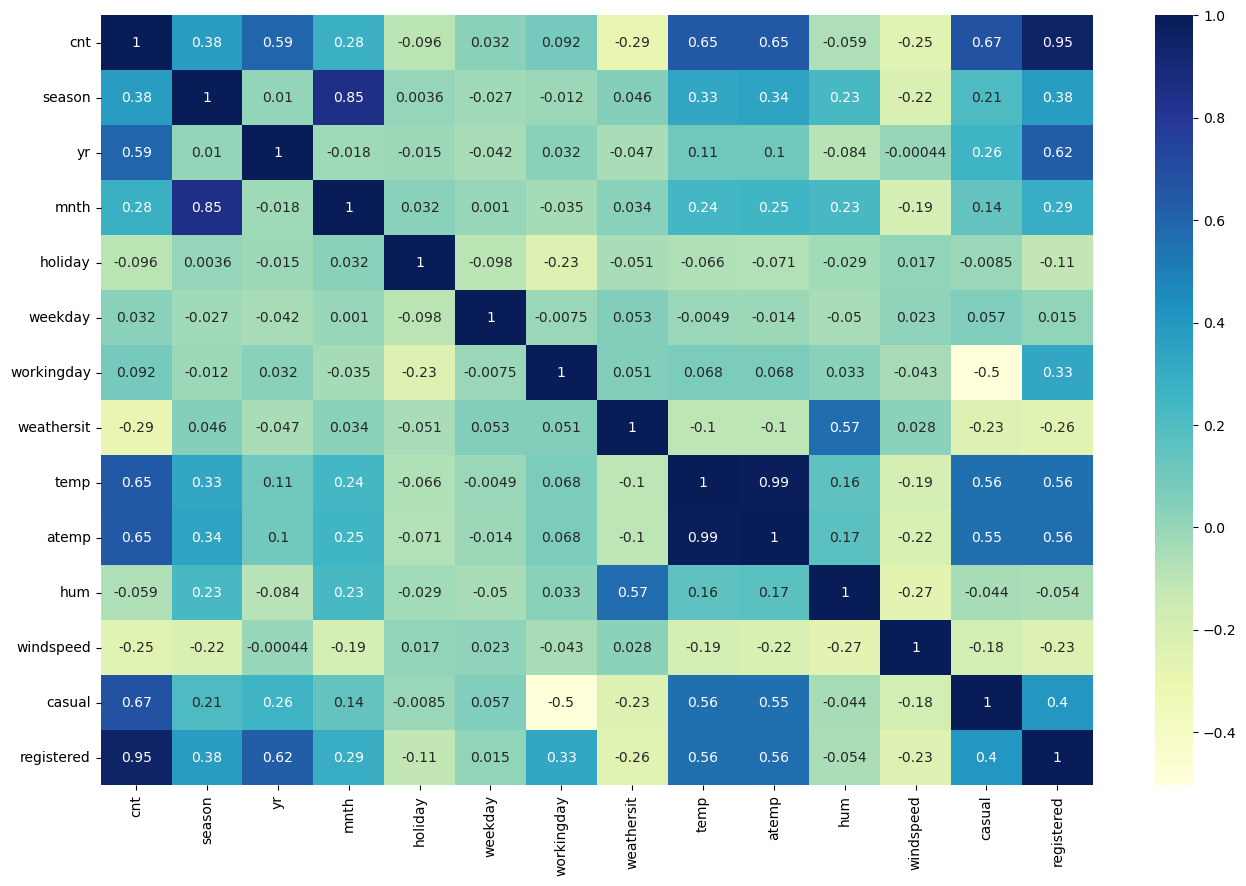

In [14]:
#heatmap
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap = "YlGnBu")
plt.show()

In [15]:
df_train.head()

,cnt,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
576,7216,3,1,7,0,2,1,1,0.815169,0.766351,0.725633,0.264686,968,6248
426,4066,1,1,3,0,6,0,2,0.442393,0.438975,0.640189,0.255342,956,3110
728,1796,1,1,12,0,0,0,1,0.245101,0.200348,0.498067,0.663106,364,1432
482,4220,2,1,4,0,6,0,2,0.395666,0.391735,0.504508,0.188475,1120,3100
111,1683,2,0,4,0,5,1,2,0.345824,0.318819,0.751824,0.380981,177,1506


In [16]:
y_train = df_train.pop('cnt')
x_train = df_train

In [17]:
x_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
576,3,1,7,0,2,1,1,0.815169,0.766351,0.725633,0.264686,968,6248
426,1,1,3,0,6,0,2,0.442393,0.438975,0.640189,0.255342,956,3110
728,1,1,12,0,0,0,1,0.245101,0.200348,0.498067,0.663106,364,1432
482,2,1,4,0,6,0,2,0.395666,0.391735,0.504508,0.188475,1120,3100
111,2,0,4,0,5,1,2,0.345824,0.318819,0.751824,0.380981,177,1506


In [18]:
y_train.head()

576    7216
426    4066
728    1796
482    4220
111    1683
Name: cnt, dtype: int64

In [19]:
#add a constant
x_train_sm = sm.add_constant(x_train['temp'])

#create first model
lr = sm.OLS(y_train, x_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    1491.214309
temp     5571.088025
dtype: float64

In [20]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           2.46e-61
Time:                        22:45:26   Log-Likelihood:                -4449.7
No. Observations:                 510   AIC:                             8903.
Df Residuals:                     508   BIC:                             8912.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1491.2143    170.676      8.737      0.000    1155.897    1826.531
temp        5571.0880    292.813     19.026      0.000    4995.815    6146.361
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# add another variable: atemp

x_train_sm = x_train[['temp','atemp']]

#add a constant
x_train_sm = sm.add_constant(x_train_sm)


#create first model
lr = sm.OLS(y_train, x_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    1435.873212
temp     1611.017958
atemp    4255.309090
dtype: float64

In [22]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           8.38e-61
Time:                        22:45:26   Log-Likelihood:                -4447.7
No. Observations:                 510   AIC:                             8901.
Df Residuals:                     507   BIC:                             8914.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1435.8732    172.475      8.325      0.000    1097.020    1774.726
temp        1611.0180   2023.854      0.796      0.426   -2365.154    5587.190
atemp       4255.3091   2151.989      1.977      0.049      27.395    8483.223
==============================================================================
Omnibus:                        4.986   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                3.696
Skew:                           0.070   Prob(JB):                        0.158
Kurtosis:                       2.607   Cond. No.                         56.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# add another variable: hum

x_train_sm = x_train[['temp','atemp','hum']]

#add a constant
x_train_sm = sm.add_constant(x_train_sm)


#create first model
lr = sm.OLS(y_train, x_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    2796.140481
temp      729.708587
atemp    5450.751656
hum     -2306.089722
dtype: float64

In [24]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     137.6
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           3.55e-65
Time:                        22:45:26   Log-Likelihood:                -4434.8
No. Observations:                 510   AIC:                             8878.
Df Residuals:                     506   BIC:                             8895.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2796.1405    314.020      8.904      0.000    2179.197    3413.084
temp         729.7086   1982.571      0.368      0.713   -3165.376    4624.793
atemp       5450.7517   2113.050      2.580      0.010    1299.320    9602.184
hum        -2306.0897    449.425     -5.131      0.000   -3189.058   -1423.121
==============================================================================
Omnibus:                        1.545   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.462   Jarque-Bera (JB):                1.495
Skew:                           0.052   Prob(JB):                        0.474
Kurtosis:                       2.756   Cond. No.                         63.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# add another variable: hum

x_train_sm = x_train[['temp','atemp','hum', 'windspeed']]

#add a constant
x_train_sm = sm.add_constant(x_train_sm)


#create first model
lr = sm.OLS(y_train, x_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const        3951.520608
temp         2415.552590
atemp        3387.176253
hum         -2838.457821
windspeed   -2044.941469
dtype: float64

In [26]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     115.1
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           1.06e-69
Time:                        22:45:26   Log-Likelihood:                -4421.6
No. Observations:                 510   AIC:                             8853.
Df Residuals:                     505   BIC:                             8874.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3951.5206    379.152     10.422      0.000    3206.611    4696.430
temp        2415.5526   1961.276      1.232      0.219   -1437.712    6268.817
atemp       3387.1763   2099.545      1.613      0.107    -737.743    7512.095
hum        -2838.4578    450.338     -6.303      0.000   -3723.224   -1953.692
windspeed  -2044.9415    395.456     -5.171      0.000   -2821.882   -1268.000
==============================================================================
Omnibus:                        2.796   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.247   Jarque-Bera (JB):                2.462
Skew:                           0.081   Prob(JB):                        0.292
Kurtosis:                       2.701   Cond. No.                         66.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Adding all variable to the model 

In [27]:
BoomBikes.columns

Index(['cnt', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered'],
      dtype='object')

In [28]:
#build models with all variables
x_train_sm = sm.add_constant(x_train)


#create first model
lr = sm.OLS(y_train, x_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const         6.252776e-13
season        5.897505e-13
yr            1.278977e-12
mnth         -2.486900e-13
holiday       5.684342e-13
weekday      -2.913225e-13
workingday    4.547474e-13
weathersit    5.684342e-13
temp          2.728484e-12
atemp        -1.818989e-12
hum          -1.477929e-12
windspeed    -5.684342e-14
casual        1.000000e+00
registered    1.000000e+00
dtype: float64

In [29]:
BoomBikes.columns

Index(['cnt', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered'],
      dtype='object')

In [30]:
#build models with all variables
x_train_sm = sm.add_constant(x_train)


#create first model
lr = sm.OLS(y_train, x_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const         6.252776e-13
season        5.897505e-13
yr            1.278977e-12
mnth         -2.486900e-13
holiday       5.684342e-13
weekday      -2.913225e-13
workingday    4.547474e-13
weathersit    5.684342e-13
temp          2.728484e-12
atemp        -1.818989e-12
hum          -1.477929e-12
windspeed    -5.684342e-14
casual        1.000000e+00
registered    1.000000e+00
dtype: float64

# Checking VIF

In [31]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,atemp,350.18
7,temp,334.54
12,registered,40.24
0,season,26.09
9,hum,25.38
2,mnth,17.28
6,weathersit,14.22
5,workingday,10.06
11,casual,8.99
1,yr,5.68


# Dropping the variable and updating the model

In [32]:
# Dropping highly correlated variables and insignificant variables

X = x_train.drop('atemp', 1,)

In [33]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [34]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.215e+31
Date:                Wed, 20 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:45:27   Log-Likelihood:                 12715.
No. Observations:                 510   AIC:                        -2.540e+04
Df Residuals:                     497   BIC:                        -2.535e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.563e-12   1.15e-12     -1.356      0.1

In [35]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,registered,39.89
0,season,26.09
8,hum,24.70
2,mnth,17.28
7,temp,16.34
6,weathersit,14.21
5,workingday,10.05
10,casual,8.98
1,yr,5.65
9,windspeed,3.77


# Dropping the Variable and Updating the Model
#### Dropping "registered" this time because of high VIF

In [36]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('registered', 1)

In [37]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [38]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     397.0
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          2.53e-238
Time:                        22:45:27   Log-Likelihood:                -4005.7
No. Observations:                 510   AIC:                             8035.
Df Residuals:                     498   BIC:                             8086.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        598.0682    197.802      3.024      0.0

In [39]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,hum,24.68
0,season,24.10
2,mnth,17.24
7,temp,14.38
6,weathersit,12.90
10,casual,7.58
5,workingday,5.69
9,windspeed,3.72
4,weekday,3.17
1,yr,2.37


# Dropping the variable and updating the model
#### Dropping "hum" because of high VIF

In [40]:
X = X.drop('hum', 1)

In [41]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [42]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     435.9
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          2.77e-239
Time:                        22:45:27   Log-Likelihood:                -4006.6
No. Observations:                 510   AIC:                             8035.
Df Residuals:                     499   BIC:                             8082.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        442.2531    158.003      2.799      0.0

In [43]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,season,23.99
2,mnth,17.02
7,temp,13.84
9,casual,7.42
6,weathersit,6.09
5,workingday,5.43
8,windspeed,3.71
4,weekday,3.16
1,yr,2.37
3,holiday,1.09


# Dropping the variable and updating the model
Dropping "season" because of high VIF

In [44]:
X = X.drop('season', 1)

In [45]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [46]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     447.5
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          8.58e-233
Time:                        22:45:27   Log-Likelihood:                -4025.0
No. Observations:                 510   AIC:                             8070.
Df Residuals:                     500   BIC:                             8112.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        562.1855    162.400      3.462      0.0

In [47]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,temp,13.64
8,casual,7.25
5,weathersit,5.89
4,workingday,5.34
1,mnth,4.56
7,windspeed,3.71
3,weekday,3.15
0,yr,2.37
2,holiday,1.09


# Dropping the variable and updating the model¶
Dropping "temp" because of high VIF

In [48]:
X = X.drop('temp', 1)

In [49]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [50]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     428.6
Date:                Wed, 20 Dec 2023   Prob (F-statistic):          1.48e-218
Time:                        22:45:27   Log-Likelihood:                -4061.6
No. Observations:                 510   AIC:                             8141.
Df Residuals:                     501   BIC:                             8179.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        681.5517    173.707      3.924      0.0

In [51]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,weathersit,5.74
1,mnth,4.33
6,windspeed,3.68
4,workingday,3.39
3,weekday,3.14
7,casual,3.12
0,yr,2.30
2,holiday,1.08


#### Now as you can see, although weathersit is in a bit higher we can consider the VIFs is within an acceptable range. So we go ahead and make our predictions using this model only.

# Residual Analysis of the train data

In [52]:
y_train_price = lr_6.predict(X_train_lm)

Text(0.5, 0, 'Errors')

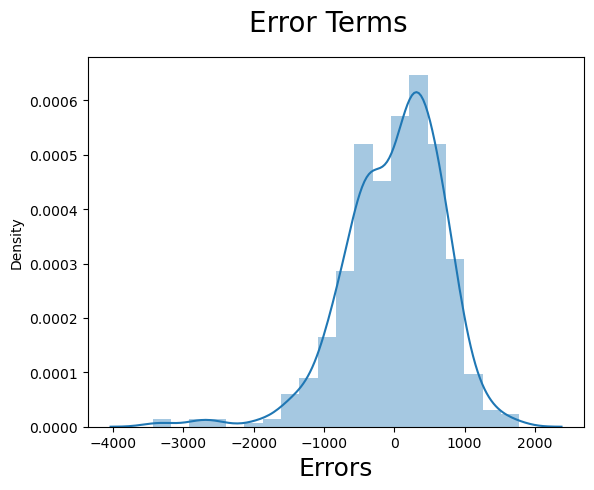

In [53]:

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Making Predictions Using the Final Model

In [54]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed' ]

df_test[num_vars] = scaler.transform(df_test[num_vars])



In [55]:
df_test.describe()

,cnt,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,4560.559091,2.463636,0.481818,6.490909,0.036364,3.013636,0.700000,1.372727,0.558718,0.532847,0.638221,0.313293,876.177273,3684.381818
std,1904.968544,1.111807,0.500809,3.422316,0.187620,1.985057,0.459303,0.538204,0.233187,0.217401,0.148694,0.159584,711.161138,1518.870624
min,441.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.046591,0.025950,0.261915,-0.042808,9.000000,432.000000
25%,3312.750000,1.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.355429,0.344870,0.529197,0.198843,338.250000,2507.750000
50%,4582.500000,2.000000,0.000000,6.000000,0.000000,3.000000,1.000000,1.000000,0.558172,0.544652,0.625590,0.300126,741.000000,3674.000000
75%,5913.000000,3.000000,1.000000,9.000000,0.000000,5.000000,1.000000,2.000000,0.755981,0.713308,0.743798,0.402718,1189.000000,4640.250000
max,8395.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.984424,0.980934,1.002146,0.807474,3410.000000,6844.000000


# Dividing into X_test and y_test

In [56]:
y_test = df_test.pop('cnt')
X_test = df_test

In [60]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [66]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(["casual"], axis = 1)

In [67]:
# Making predictions using the fourth model

y_pred_m4 = lr_2.predict(X_test_m4)

# Model Evaluation

Text(0, 0.5, 'y_pred')

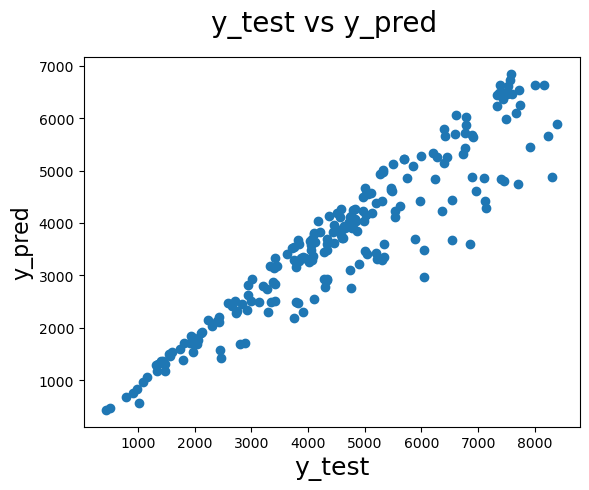

In [68]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [71]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m4)

0.6482629636988